In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('helpdesk_customer_tickets.csv')

In [3]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN


In [4]:
df.info()
df['language'].unique()
df['business_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    int64  
 1   subject        599 non-null    object 
 2   body           600 non-null    object 
 3   answer         600 non-null    object 
 4   type           600 non-null    object 
 5   queue          600 non-null    object 
 6   priority       600 non-null    object 
 7   language       600 non-null    object 
 8   business_type  600 non-null    object 
 9   tag_1          600 non-null    object 
 10  tag_2          600 non-null    object 
 11  tag_3          600 non-null    object 
 12  tag_4          600 non-null    object 
 13  tag_5          432 non-null    object 
 14  tag_6          173 non-null    object 
 15  tag_7          56 non-null     object 
 16  tag_8          9 non-null      object 
 17  tag_9          0 non-null      float64
dtypes: float64

,count
business_type,
Tech Online Store,288
IT Services,196
Software Development Company,76
IT Consulting Firm,40


type
Incident    253
Request     148
Problem     145
Change       54
Name: count, dtype: int64


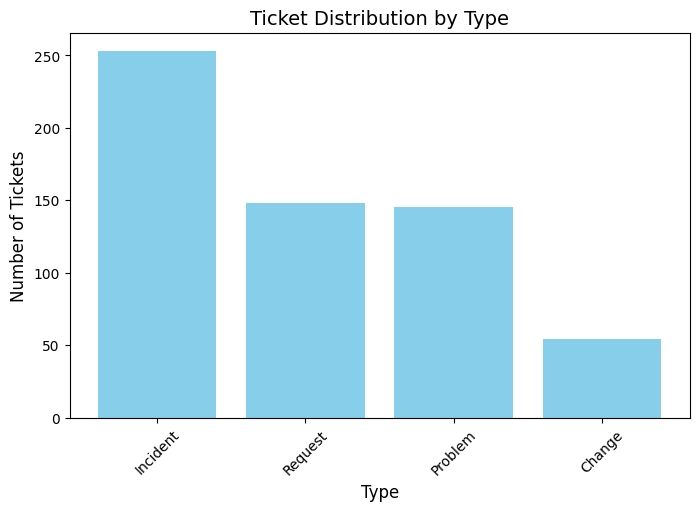

In [5]:
# Ticket Distribution by type
ticket_distribution = df['type'].value_counts()
print(ticket_distribution)
plt.figure(figsize=(8, 5))
plt.bar(ticket_distribution.index, ticket_distribution.values, color='skyblue')
plt.title('Ticket Distribution by Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(rotation=45)
plt.show()


priority
high      266
medium    205
low       129
Name: count, dtype: int64


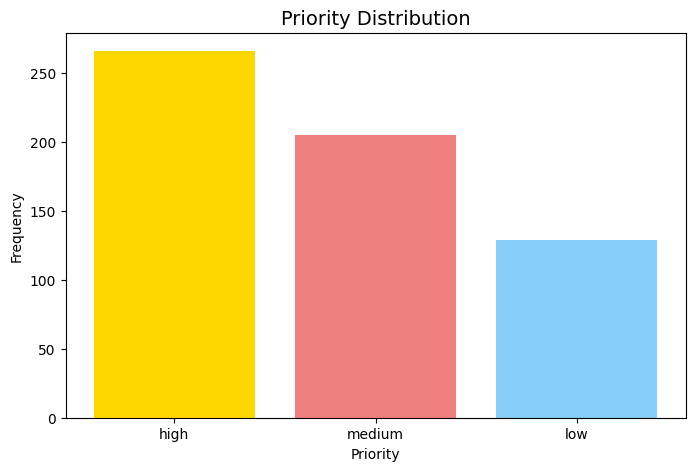

In [6]:
# Calculate the frequency of each ticket type
priority_distribution = df['priority'].value_counts()

# Print the frequency of each ticket type
print(priority_distribution)

# Create a bar plot of the ticket distribution
plt.figure(figsize=(8, 5))
plt.bar(priority_distribution.index, priority_distribution.values, color=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Priority Distribution', fontsize=14)
plt.xlabel('Priority')
plt.ylabel('Frequency')  # Changed y-axis label to 'Frequency'
plt.show()

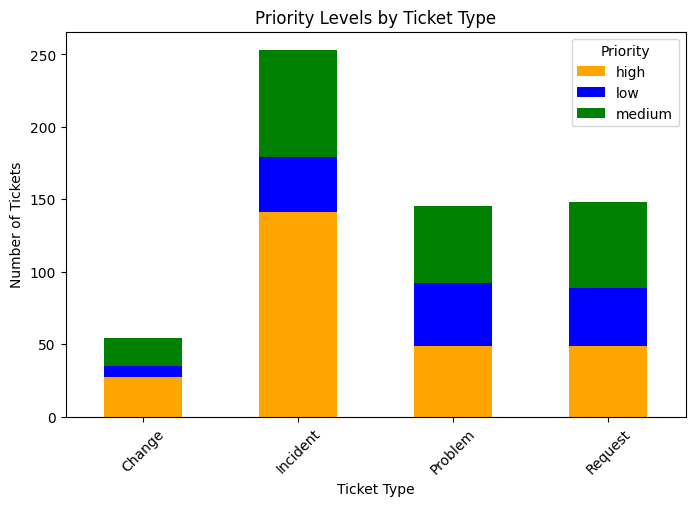

In [7]:
# Priority levels by ticket types
priority_type_dependency = df.groupby(['type', 'priority']).size().unstack(fill_value=0)

# Plot as a stacked bar chart
priority_type_dependency.plot(kind='bar', stacked=True, figsize=(8, 5), color=['orange', 'blue', 'green'])
plt.title('Priority Levels by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.legend(title='Priority')
plt.xticks(rotation=45)
plt.show()

Most Frequent Tags:
 Tag
Technical Support     522
Problem Resolution    485
Product Support       314
Urgent Issue          254
Hardware Failure      191
Software Bug          190
IT Support            132
Customer Service      120
Service Disruption     76
Technical Guidance     73
Name: count, dtype: int64


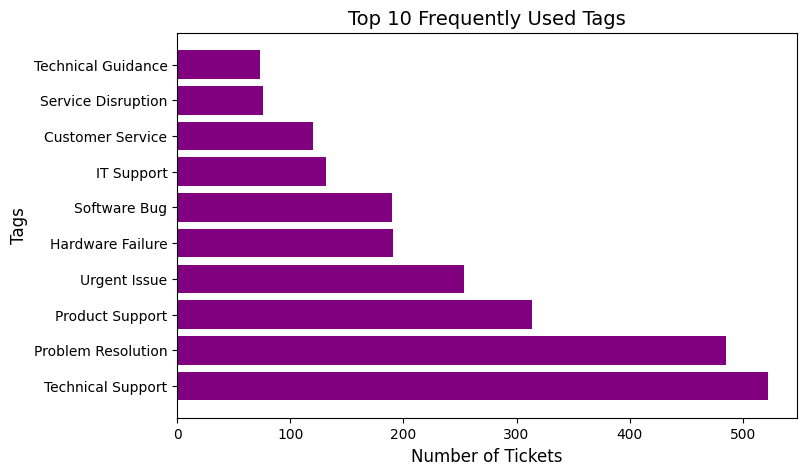

In [8]:
# Frequently used tags
frequent_tags = df[[f'tag_{i}' for i in range(1, 10)]].melt(value_name="Tag").dropna()["Tag"].value_counts()
# Also print the most frequent tags with their corresponding frequency
print("Most Frequent Tags:\n", frequent_tags.head(10))

plt.figure(figsize=(8, 5))
plt.barh(frequent_tags.head(10).index, frequent_tags.head(10).values, color='purple')
plt.title('Top 10 Frequently Used Tags', fontsize=14)
plt.xlabel('Number of Tickets', fontsize=12)
plt.ylabel('Tags', fontsize=12)
plt.show()


queue
Technical Support                  210
Product Support                     93
Customer Service                    85
IT Support                          77
Billing and Payments                46
Returns and Exchanges               41
Human Resources                     15
Service Outages and Maintenance     15
Sales and Pre-Sales                 13
General Inquiry                      5
Name: count, dtype: int64


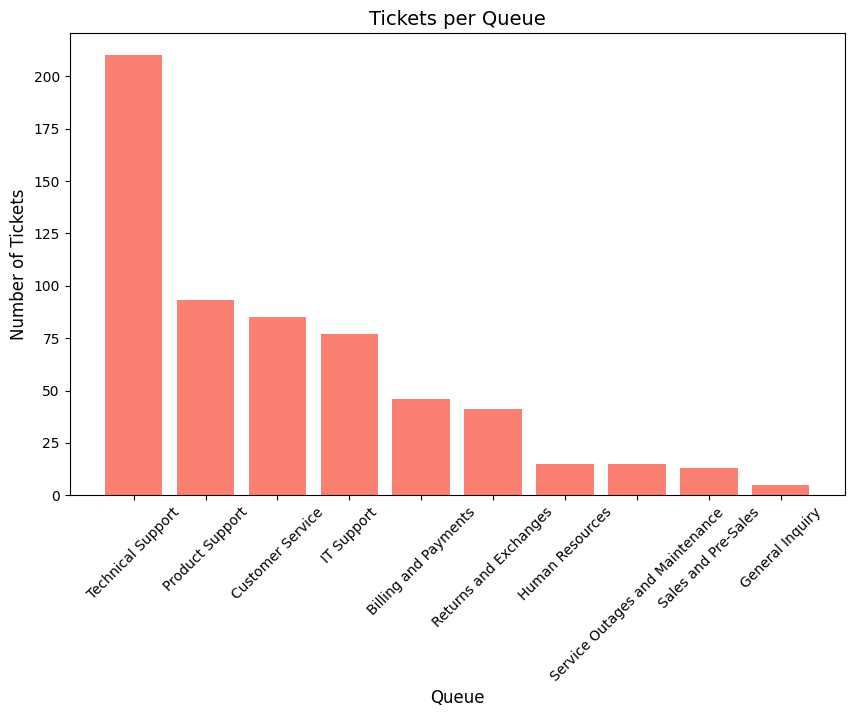

In [9]:
# Tickets per queue
queue_distribution = df['queue'].value_counts()
print(queue_distribution)

plt.figure(figsize=(10, 6))
plt.bar(queue_distribution.index, queue_distribution.values, color='salmon')
plt.title('Tickets per Queue', fontsize=14)
plt.xlabel('Queue', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(rotation=45)
plt.show()

business_type
Tech Online Store               288
IT Services                     196
Software Development Company     76
IT Consulting Firm               40
Name: count, dtype: int64


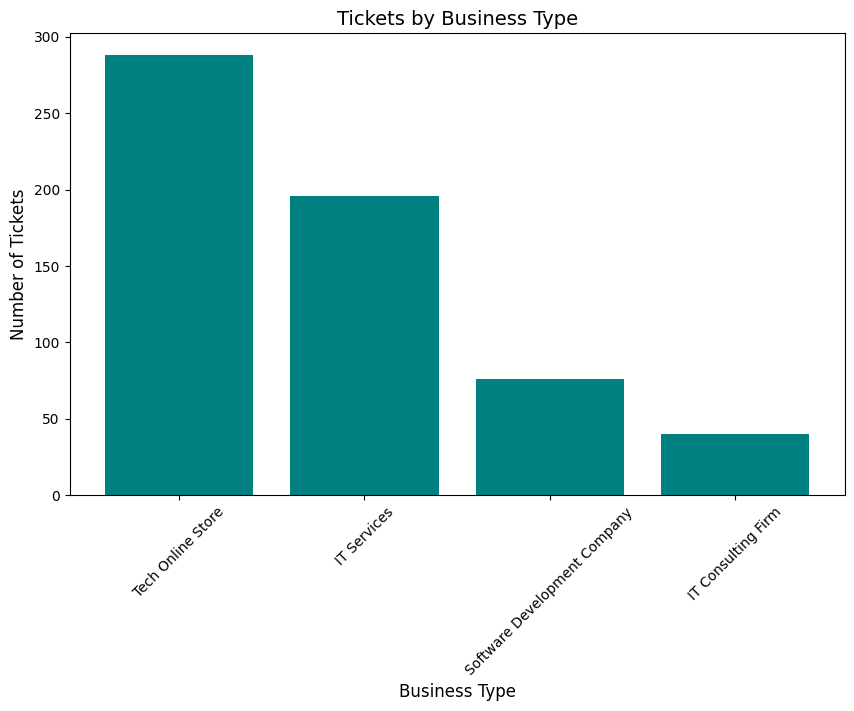

In [10]:
# Tickets by business type
business_type_distribution = df['business_type'].value_counts()
print(business_type_distribution)
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(business_type_distribution.index, business_type_distribution.values, color='teal')
plt.title('Tickets by Business Type', fontsize=14)
plt.xlabel('Business Type', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(rotation=45)
plt.show()
